<a href="https://colab.research.google.com/github/AmruthaMadhavarapu/simple-image-classification-using-DL/blob/main/Food_Waste_vs_Climate_Impact_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 1. Loading Data ---
Successfully loaded '/content/food_waste_climate_impact_with_population.csv'

First 5 rows of the dataset:
  Food Category  Quantity Wasted (tons)  GHG Emissions (kg CO₂e/ton)  \
0       Poultry                     800                         6000   
1         Dairy                    1200                         3000   
2         Wheat                    1500                         1500   
3          Rice                     900                         2500   
4    Vegetables                    2000                          500   

   Water Usage (liters/ton)  Land Use (m²/ton)         Region  Year  \
0                   4000000                 70         Europe  2022   
1                   1000000                 40           Asia  2022   
2                   1300000                 20  South America  2022   
3                   2500000                 30         Africa  2022   
4                    300000                 10         Europe  2022   

   Estima

/tmp/ipython-input-1-4226582428.py:162: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


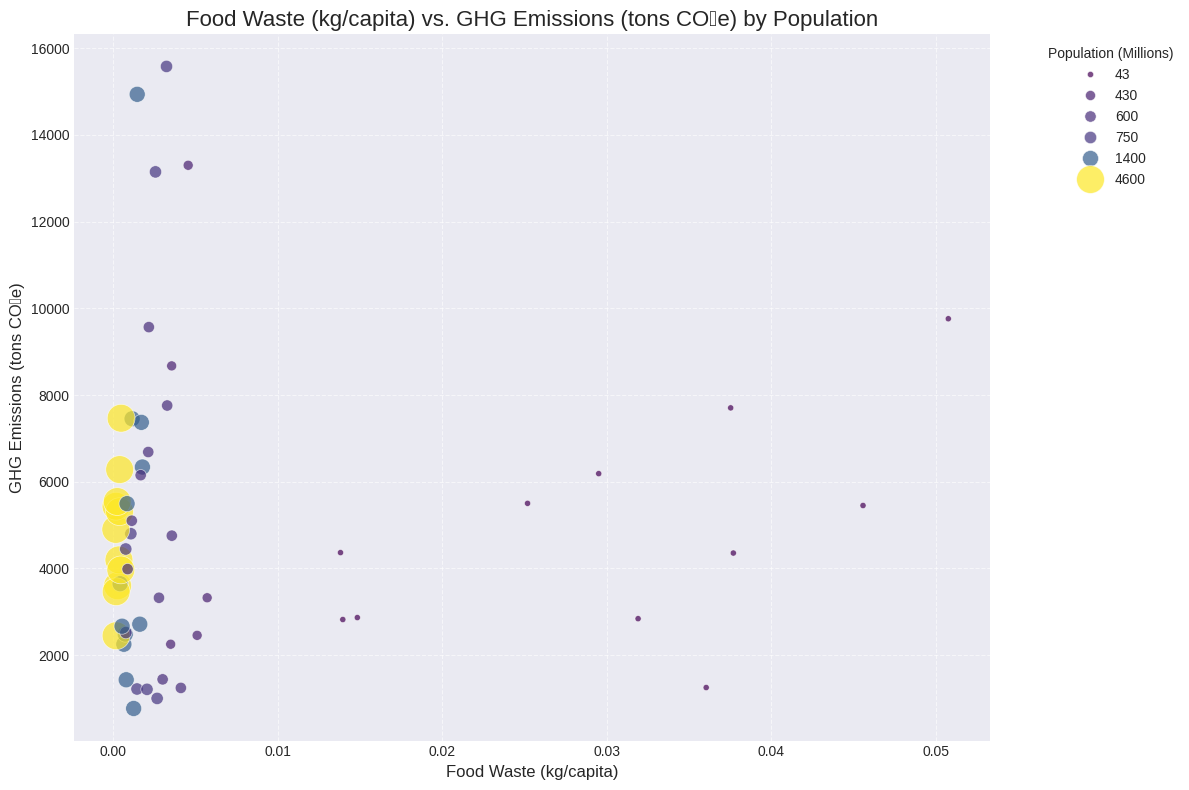

/tmp/ipython-input-1-4226582428.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


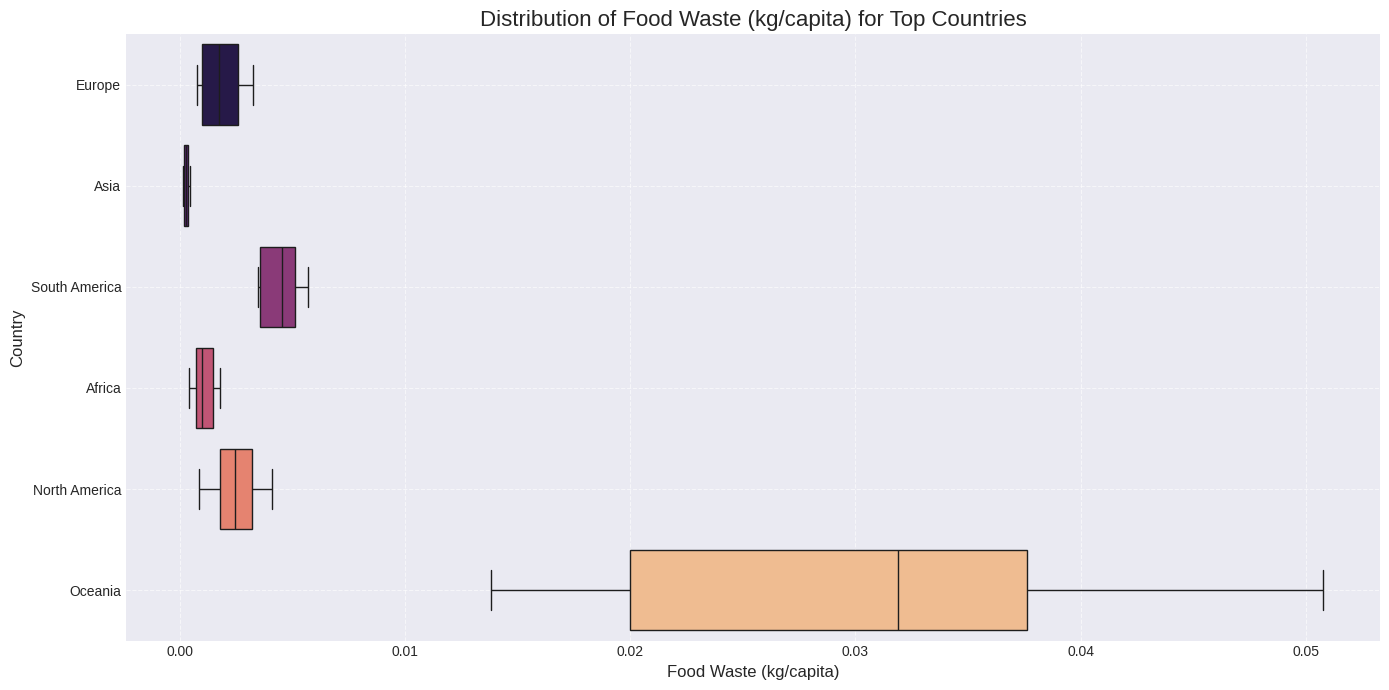

/tmp/ipython-input-1-4226582428.py:219: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


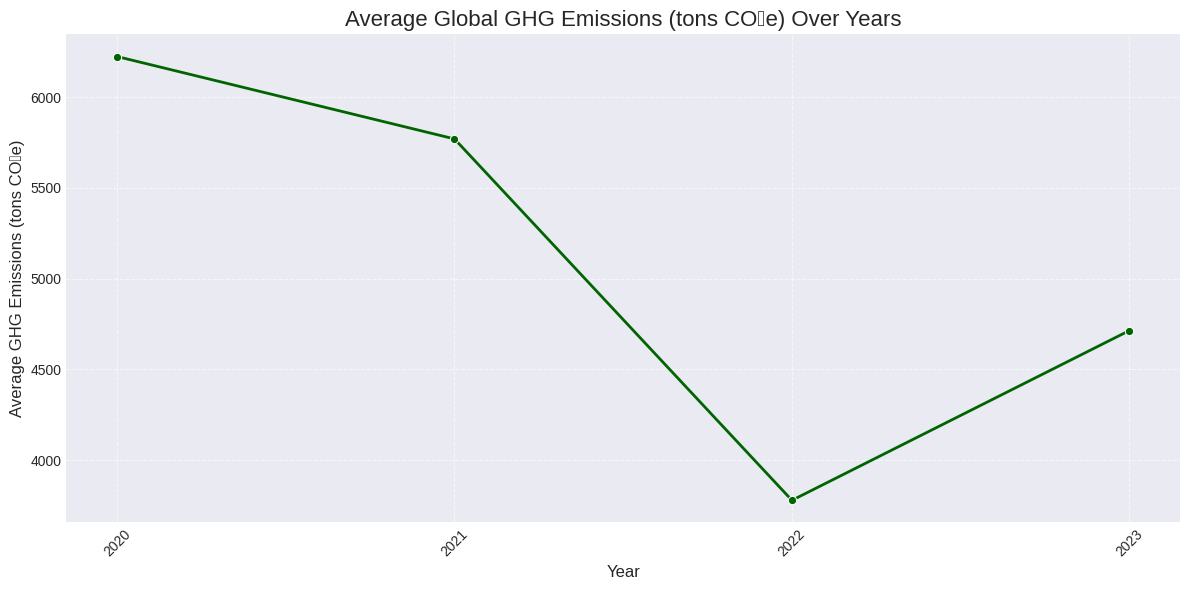


--- 6. Generating Pie Charts ---


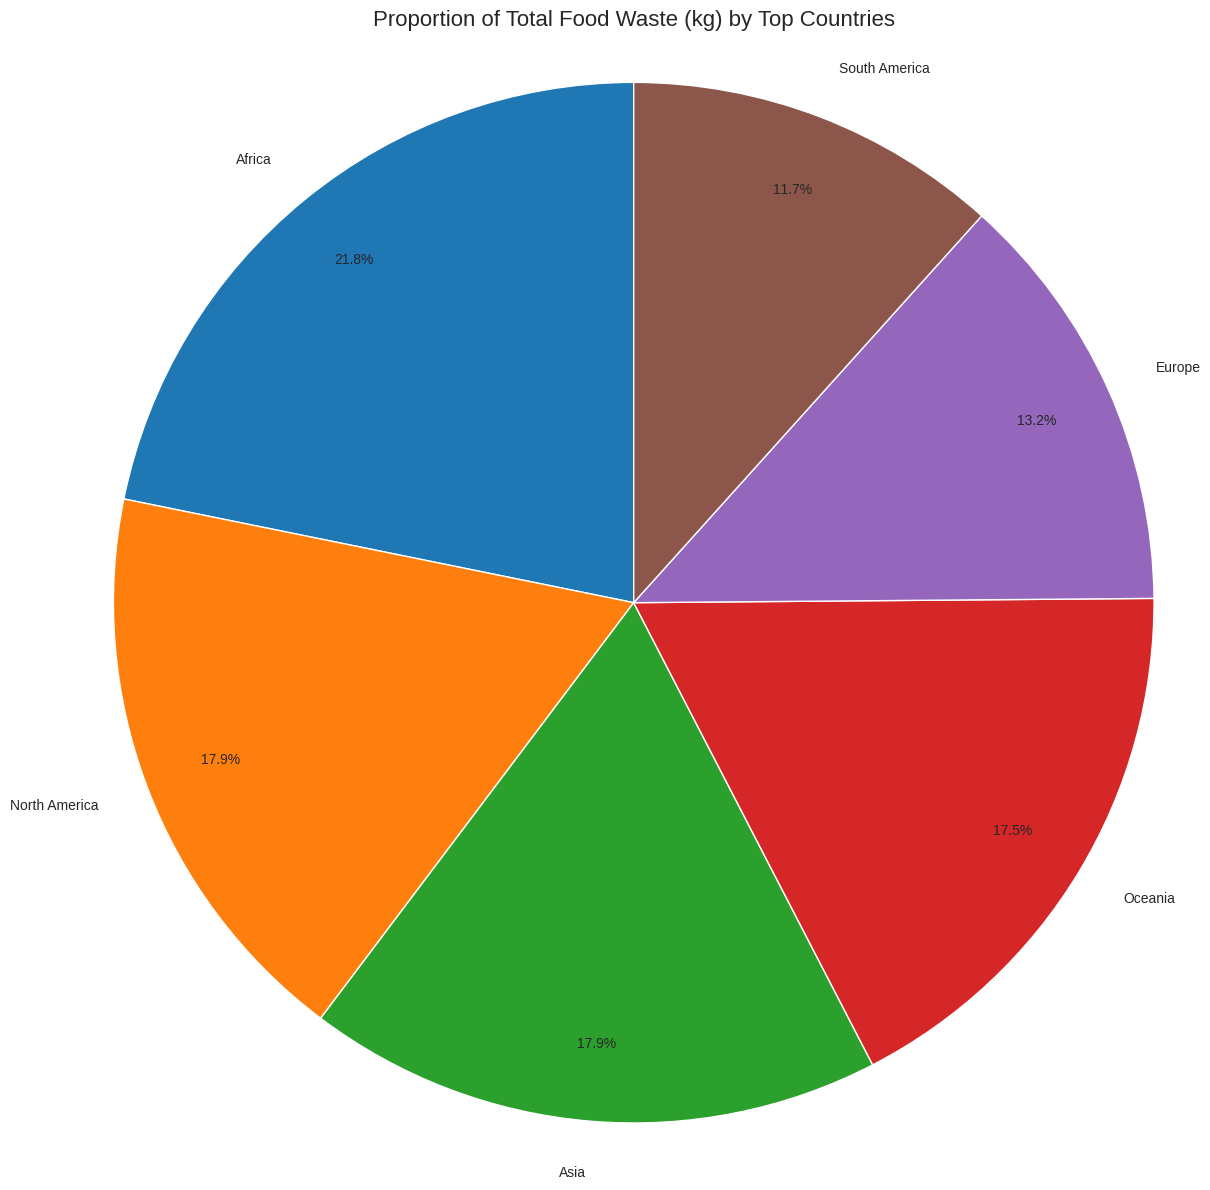

/tmp/ipython-input-1-4226582428.py:310: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


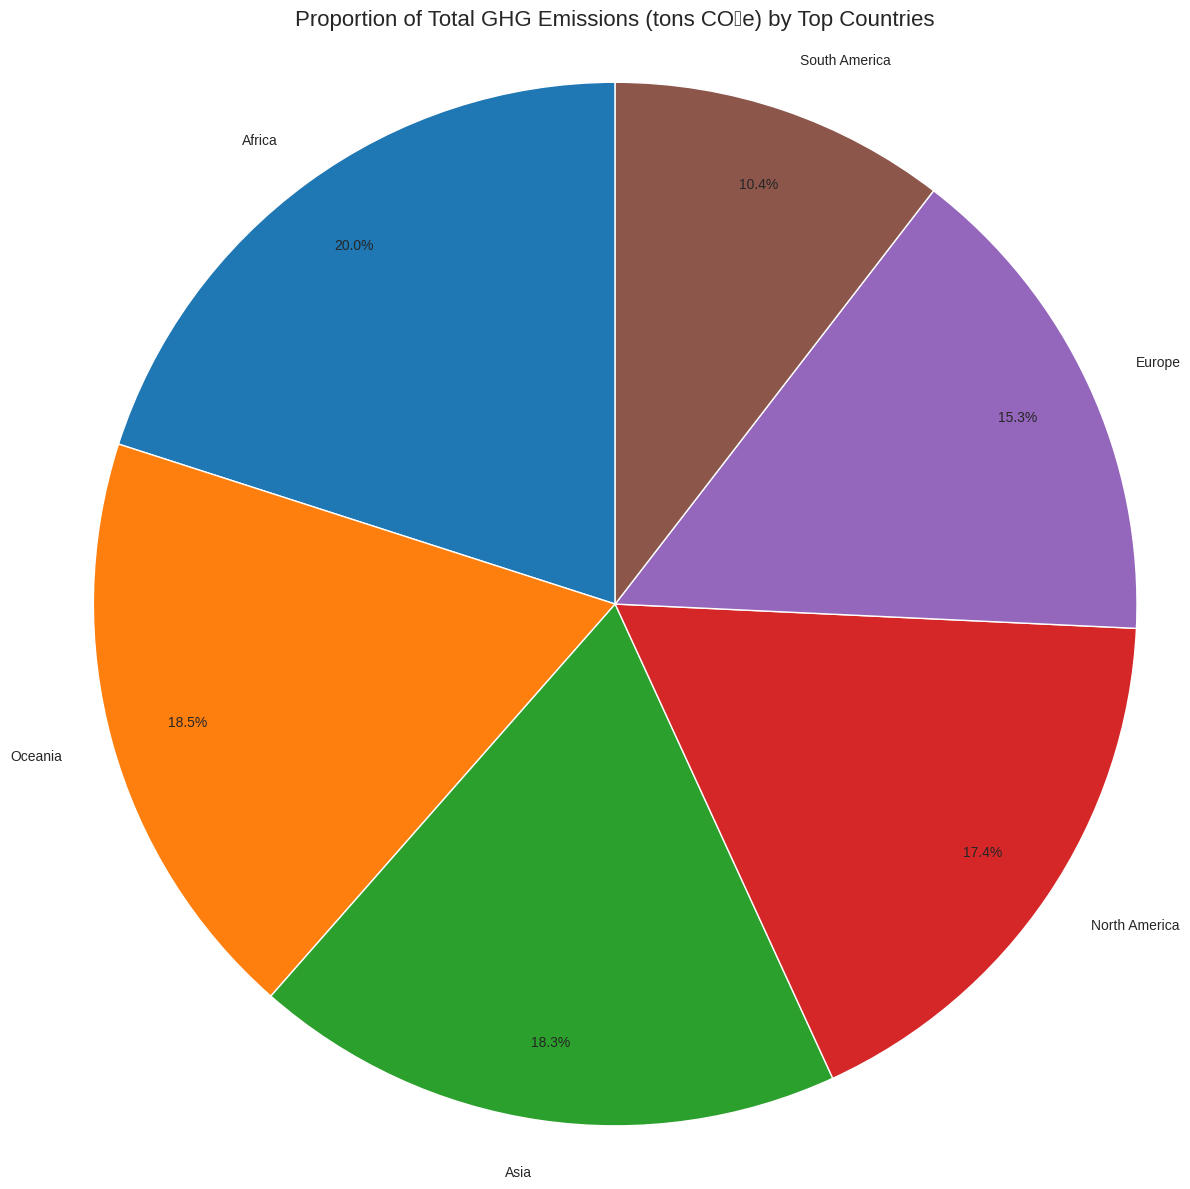


--- Analysis Complete ---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuration ---
CSV_FILE_PATH = '/content/food_waste_climate_impact_with_population.csv'

# --- Data Loading and Initial Inspection ---
print("--- 1. Loading Data ---")
try:
    df = pd.read_csv(CSV_FILE_PATH)
    print(f"Successfully loaded '{CSV_FILE_PATH}'")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Information:")
    df.info()
    # CRITICAL DEBUGGING STEP: Print original column names
    print("\nOriginal Column Names directly after loading:")
    print(df.columns.tolist())
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found. Please ensure it's in the same directory.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")
    exit()

# --- Data Cleaning and Preprocessing ---
print("\n--- 2. Data Cleaning and Preprocessing ---")

# Define the exact original column names as they appear in the CSV
# based on the output from your previous run.
original_food_waste_per_capita_col = 'Waste per Capita (kg/person)'
original_total_emissions_col = 'Total Emissions (tons CO₂e)'
original_population_col = 'Estimated Population (millions)'
original_region_col = 'Region' # This will be renamed to 'Country' for consistency

# Check if original columns exist before renaming
missing_original_cols = []
if original_food_waste_per_capita_col not in df.columns:
    missing_original_cols.append(original_food_waste_per_capita_col)
if original_total_emissions_col not in df.columns:
    missing_original_cols.append(original_total_emissions_col)
if original_population_col not in df.columns:
    missing_original_cols.append(original_population_col)
if original_region_col not in df.columns:
    missing_original_cols.append(original_region_col)

if missing_original_cols:
    print(f"\nError: The following expected original columns were not found in the CSV: {missing_original_cols}")
    print("Please check your CSV file's headers for exact matches (case, spaces, special characters).")
    print(f"Available columns are: {df.columns.tolist()}")
    exit()

# Rename columns for easier access and consistency
df.rename(columns={
    original_food_waste_per_capita_col: 'FoodWaste_kg_per_capita',
    original_total_emissions_col: 'GHG_Emissions_MtCO2eq', # Renaming to align with previous logic, units are tons CO2e
    original_population_col: 'Population',
    original_region_col: 'Country'
}, inplace=True)

# Print columns after rename to verify
print("\nColumn Names after renaming attempt:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Drop rows with any missing values in the key columns required for analysis
initial_rows = df.shape[0]
df.dropna(subset=['FoodWaste_kg_per_capita', 'GHG_Emissions_MtCO2eq', 'Population', 'Country', 'Year'], inplace=True)
cleaned_rows = df.shape[0]
print(f"\nDropped {initial_rows - cleaned_rows} rows with missing values in key columns.")
print("Missing values after cleaning:")
print(df.isnull().sum())

# Convert 'Year' to integer if it's not already
if 'Year' in df.columns:
    # Handle potential non-numeric values in 'Year' by coercing to numeric and then dropping NaNs
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df.dropna(subset=['Year'], inplace=True) # Drop rows where 'Year' couldn't be converted
    df['Year'] = df['Year'].astype(int)
else:
    print("\nWarning: 'Year' column not found. Skipping year conversion.")


# --- Exploratory Data Analysis (EDA) ---
print("\n--- 3. Exploratory Data Analysis (EDA) ---")
numeric_cols = ['FoodWaste_kg_per_capita', 'GHG_Emissions_MtCO2eq', 'Population']
existing_numeric_cols = [col for col in numeric_cols if col in df.columns]

if existing_numeric_cols:
    print("\nDescriptive Statistics for Numerical Columns:")
    print(df[existing_numeric_cols].describe())
else:
    print("\nNo numeric columns found for descriptive statistics after cleaning.")


# Check unique countries and years
if 'Country' in df.columns:
    print(f"\nNumber of unique countries: {df['Country'].nunique()}")
else:
    print("\n'Country' column not found.")

if 'Year' in df.columns:
    print(f"Years covered: {df['Year'].min()} - {df['Year'].max()}")
else:
    print("'Year' column not found.")


# --- Correlation Analysis ---
print("\n--- 4. Correlation Analysis ---")
if len(existing_numeric_cols) >= 2: # Need at least two columns for correlation
    correlation_matrix = df[existing_numeric_cols].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Insights from correlation matrix
    print("\nInsights from Correlation:")
    if 'FoodWaste_kg_per_capita' in correlation_matrix.columns and 'GHG_Emissions_MtCO2eq' in correlation_matrix.columns:
        corr_fw_ghg = correlation_matrix.loc['FoodWaste_kg_per_capita', 'GHG_Emissions_MtCO2eq']
        print(f"- Correlation between Food Waste (kg/capita) and GHG Emissions (MtCO2eq): {corr_fw_ghg:.2f}")
        if abs(corr_fw_ghg) > 0.5:
            print("  (A strong positive/negative linear relationship is indicated.)")
        elif abs(corr_fw_ghg) > 0.2:
            print("  (A moderate positive/negative linear relationship is indicated.)")
        else:
            print("  (A weak or no linear relationship is indicated.)")
    else:
        print("- Could not calculate specific correlation due to missing columns post-processing.")
else:
    print("\nNot enough numerical columns available to perform correlation analysis.")

# --- Data Visualization ---
print("\n--- 5. Data Visualization ---")
plt.style.use('seaborn-v0_8-darkgrid') # Modern looking grid style for plots

# Figure 1: Scatter plot of Food Waste vs. GHG Emissions (colored by Population)
if 'FoodWaste_kg_per_capita' in df.columns and \
   'GHG_Emissions_MtCO2eq' in df.columns and \
   'Population' in df.columns:
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=df,
        x='FoodWaste_kg_per_capita',
        y='GHG_Emissions_MtCO2eq',
        hue='Population', # Color points based on population
        size='Population', # Size points based on population
        sizes=(20, 400), # Range of sizes for the points
        palette='viridis', # Color palette
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5
    )
    plt.title('Food Waste (kg/capita) vs. GHG Emissions (tons CO₂e) by Population', fontsize=16)
    plt.xlabel('Food Waste (kg/capita)', fontsize=12)
    plt.ylabel('GHG Emissions (tons CO₂e)', fontsize=12) # Adjusted label unit
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Population (Millions)', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjusted legend title
    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping Scatter Plot: Required columns ('FoodWaste_kg_per_capita', 'GHG_Emissions_MtCO2eq', 'Population') not found.")


# Figure 2: Box plot of Food Waste per capita by Country (Top N or example)
if 'Country' in df.columns and 'FoodWaste_kg_per_capita' in df.columns:
    if not df.empty and 'FoodWaste_kg_per_capita' in df.columns and 'Country' in df.columns:
        if df['Country'].nunique() > 0:
            top_n_countries = df.groupby('Country')['FoodWaste_kg_per_capita'].mean().nlargest(10).index
            df_top_countries_fw = df[df['Country'].isin(top_n_countries)]

            if not df_top_countries_fw.empty:
                plt.figure(figsize=(14, 7))
                sns.boxplot(
                    data=df_top_countries_fw,
                    x='FoodWaste_kg_per_capita',
                    y='Country',
                    palette='magma'
                )
                plt.title('Distribution of Food Waste (kg/capita) for Top Countries', fontsize=16)
                plt.xlabel('Food Waste (kg/capita)', fontsize=12)
                plt.ylabel('Country', fontsize=12)
                plt.grid(True, linestyle='--', alpha=0.6)
                plt.tight_layout()
                plt.show()
            else:
                print("\nNo data to generate 'Food Waste per capita by Country' box plot for top countries after filtering.")
        else:
            print("\nSkipping Box Plot: No unique countries found in the data.")
    else:
        print("\nSkipping Box Plot: DataFrame is empty or required columns missing after cleaning.")
else:
    print("\nSkipping Box Plot: Required columns ('Country', 'FoodWaste_kg_per_capita') not found.")


# Figure 3: Time Series Analysis (Average GHG Emissions over Years)
if 'Year' in df.columns and 'GHG_Emissions_MtCO2eq' in df.columns:
    if not df.empty and 'Year' in df.columns and 'GHG_Emissions_MtCO2eq' in df.columns:
        avg_ghg_by_year = df.groupby('Year')['GHG_Emissions_MtCO2eq'].mean().reset_index()

        if not avg_ghg_by_year.empty:
            plt.figure(figsize=(12, 6))
            sns.lineplot(
                data=avg_ghg_by_year,
                x='Year',
                y='GHG_Emissions_MtCO2eq',
                marker='o',
                color='darkgreen',
                linewidth=2
            )
            plt.title('Average Global GHG Emissions (tons CO₂e) Over Years', fontsize=16) # Adjusted label unit
            plt.xlabel('Year', fontsize=12)
            plt.ylabel('Average GHG Emissions (tons CO₂e)', fontsize=12) # Adjusted label unit
            plt.xticks(avg_ghg_by_year['Year'].unique(), rotation=45)
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo data to generate 'Average GHG Emissions Over Years' line plot after grouping.")
    else:
        print("\nSkipping Line Plot: DataFrame is empty or required columns missing after cleaning.")
else:
    print("\nSkipping Line Plot: Required columns ('Year', 'GHG_Emissions_MtCO2eq') not found.")


# --- Pie Charts (New Request) ---
print("\n--- 6. Generating Pie Charts ---")

# Pie chart 1: Distribution of Total Food Waste by Top 10 Countries
if 'Country' in df.columns and 'FoodWaste_kg_per_capita' in df.columns and 'Population' in df.columns:
    if not df.empty:
        # Calculate total food waste per country: FoodWaste_kg_per_capita * Population
        df['Total_Food_Waste_kg'] = df['FoodWaste_kg_per_capita'] * df['Population']

        # Group by country and sum up Total_Food_Waste_kg
        country_total_food_waste = df.groupby('Country')['Total_Food_Waste_kg'].sum().nlargest(10)

        if not country_total_food_waste.empty:
            # Add an 'Other' category if there are remaining smaller countries
            total_sum_all_countries = df['Total_Food_Waste_kg'].sum()
            sum_of_top_countries = country_total_food_waste.sum()

            if sum_of_top_countries < total_sum_all_countries:
                 other_waste = total_sum_all_countries - sum_of_top_countries
                 if other_waste > 0:
                     # Check if 'Other' already exists as an index before adding
                     if 'Other' in country_total_food_waste.index:
                         country_total_food_waste.loc['Other'] += other_waste
                     else:
                         country_total_food_waste.loc['Other'] = other_waste

            country_total_food_waste = country_total_food_waste.sort_values(ascending=False)

            plt.figure(figsize=(12, 12)) # Increase figure size for better readability
            plt.pie(
                country_total_food_waste,
                labels=country_total_food_waste.index,
                autopct='%1.1f%%', # Format percentage
                startangle=90,
                pctdistance=0.85, # Distance of percentage labels from center
                wedgeprops={'edgecolor': 'white', 'linewidth': 1}, # White lines between slices
                textprops={'fontsize': 10} # Font size for labels
            )
            plt.title('Proportion of Total Food Waste (kg) by Top Countries', fontsize=16)
            plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo significant data to generate 'Total Food Waste by Country' pie chart.")
    else:
        print("\nSkipping Total Food Waste Pie Chart: DataFrame is empty after cleaning.")
else:
    print("\nSkipping Total Food Waste Pie Chart: Required columns (Country, FoodWaste_kg_per_capita, Population) not found.")


# Pie chart 2: Distribution of GHG Emissions by Top 10 Countries
if 'Country' in df.columns and 'GHG_Emissions_MtCO2eq' in df.columns:
    if not df.empty:
        country_total_ghg_emissions = df.groupby('Country')['GHG_Emissions_MtCO2eq'].sum().nlargest(10)

        if not country_total_ghg_emissions.empty:
            total_sum_all_ghg = df['GHG_Emissions_MtCO2eq'].sum()
            sum_of_top_ghg = country_total_ghg_emissions.sum()

            if sum_of_top_ghg < total_sum_all_ghg:
                other_emissions = total_sum_all_ghg - sum_of_top_ghg
                if other_emissions > 0:
                     if 'Other' in country_total_ghg_emissions.index:
                         country_total_ghg_emissions.loc['Other'] += other_emissions
                     else:
                         country_total_ghg_emissions.loc['Other'] = other_emissions

            country_total_ghg_emissions = country_total_ghg_emissions.sort_values(ascending=False)

            plt.figure(figsize=(12, 12)) # Increase figure size for better readability
            plt.pie(
                country_total_ghg_emissions,
                labels=country_total_ghg_emissions.index,
                autopct='%1.1f%%',
                startangle=90,
                pctdistance=0.85,
                wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                textprops={'fontsize': 10}
            )
            plt.title('Proportion of Total GHG Emissions (tons CO₂e) by Top Countries', fontsize=16) # Adjusted label unit
            plt.axis('equal')
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo significant data to generate 'GHG Emissions by Country' pie chart.")
    else:
        print("\nSkipping GHG Emissions Pie Chart: DataFrame is empty after cleaning.")
else:
    print("\nSkipping GHG Emissions Pie Chart: Required columns (Country, GHG_Emissions_MtCO2eq) not found.")


print("\n--- Analysis Complete ---")